# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# MOVIES DATASET

## Loading the data

In [2]:
dataset_movies=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/movies.csv')
dataset_links=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/links.csv')
dataset_ratings=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/ratings.csv')
dataset_tags=pd.read_csv('C:/Users/Caio Laptop/OneDrive - The University of Kansas/Documents/PhD/11. Courses/19. EECS 731 - Introduction to Data Science/Homework/Section 5 - HW/Datasets/tags.csv')

In [3]:
#sns.pairplot(dataset_movies, hue="genres", size=15)

## Data Wrangling

### Creating a single dataset with movies and tags (Merging)

In [4]:
dataset_ratings_movies=pd.merge(dataset_ratings, dataset_movies, how='outer', on='movieId')
dataset_ratings_movies_tags=pd.merge(dataset_ratings_movies, dataset_tags, how='outer', on='movieId')

In [5]:
print("Shape: %s" % str(dataset_ratings_movies_tags.shape))
print("------------------------------------------------------------------")
dataset_ratings_movies_tags.head()

Shape: (285783, 9)
------------------------------------------------------------------


,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
0,1.0,1,4.0,964982703.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
1,1.0,1,4.0,964982703.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09
2,1.0,1,4.0,964982703.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,567.0,fun,1.525286e+09
3,5.0,1,4.0,847434962.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,336.0,pixar,1.139046e+09
4,5.0,1,4.0,847434962.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,474.0,pixar,1.137207e+09


In [6]:
print("Shape: %s" % str(dataset_ratings_movies.shape))
print("------------------------------------------------------------------")
dataset_ratings_movies.head()

Shape: (100854, 6)
------------------------------------------------------------------


,userId,movieId,rating,timestamp,title,genres
0,1.0,1,4.0,9.649827e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5.0,1,4.0,8.474350e+08,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7.0,1,4.5,1.106636e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15.0,1,2.5,1.510578e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17.0,1,4.5,1.305696e+09,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


## Top Movies and Tags

Since the dataset is large with so many different movie titles and tags, the idea is to work only with the most common one in
the original dataset.

Now I create a subset from the original using selecting only tags that appeared more than 1000 times in the original dataset.

In [7]:
counts_tags=dataset_ratings_movies_tags['tag'].value_counts()
print(counts_tags[counts_tags > 1000])
tags_top=dataset_ratings_movies_tags[dataset_ratings_movies_tags['tag'].isin(counts_tags[counts_tags > 1000].index)]
print("------------------------------------------------------------------")
print("Shape: %s" % str(tags_top.shape))
tags_top.head()

sci-fi               2527
thought-provoking    2487
twist ending         2434
atmospheric          2227
dark comedy          2056
superhero            1787
psychology           1750
Disney               1748
time travel          1730
suspense             1716
classic              1625
imdb top 250         1506
quirky               1414
space                1413
mindfuck             1401
disturbing           1378
psychological        1339
surreal              1336
action               1322
great soundtrack     1299
stylized             1222
crime                1190
aliens               1155
dreamlike            1144
violence             1092
funny                1092
cult film            1078
Mafia                1060
Quentin Tarantino    1053
music                1030
philosophy           1022
emotional            1019
Name: tag, dtype: int64
------------------------------------------------------------------
Shape: (47652, 9)


,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
852,1.0,47,5.0,964983815.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
855,4.0,47,2.0,945173425.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
858,6.0,47,4.0,845553317.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
861,8.0,47,4.0,839463546.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09
864,13.0,47,5.0,987895819.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,424.0,twist ending,1.457842e+09


In [8]:
counts_title=tags_top['title'].value_counts()
print(counts_title[counts_title > 1000])
title_top=tags_top[tags_top['title'].isin(counts_title[counts_title > 1000].index)]
print("------------------------------------------------------------------")
print("Shape: %s" % str(title_top.shape))
title_top.head()

Pulp Fiction (1994)                             6754
Fight Club (1999)                               5014
Inception (2010)                                2145
Star Wars: Episode IV - A New Hope (1977)       2008
Donnie Darko (2001)                             1962
Eternal Sunshine of the Spotless Mind (2004)    1310
2001: A Space Odyssey (1968)                    1090
Name: title, dtype: int64
------------------------------------------------------------------
Shape: (20283, 9)


,userId_x,movieId,rating,timestamp_x,title,genres,userId_y,tag,timestamp_y
6273,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,63.0,classic,1.443200e+09
6275,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,action,1.439166e+09
6276,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,76.0,sci-fi,1.439166e+09
6278,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,103.0,great soundtrack,1.431954e+09
6282,1.0,260,5.0,964981680.0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,119.0,classic,1.435943e+09


# Pairplots

Below is a pairplot of rating by movies, using my subset with the top movies (i.e., dataset = "title_top", in which the movie title appeared more than 1000 times in the original dataset)

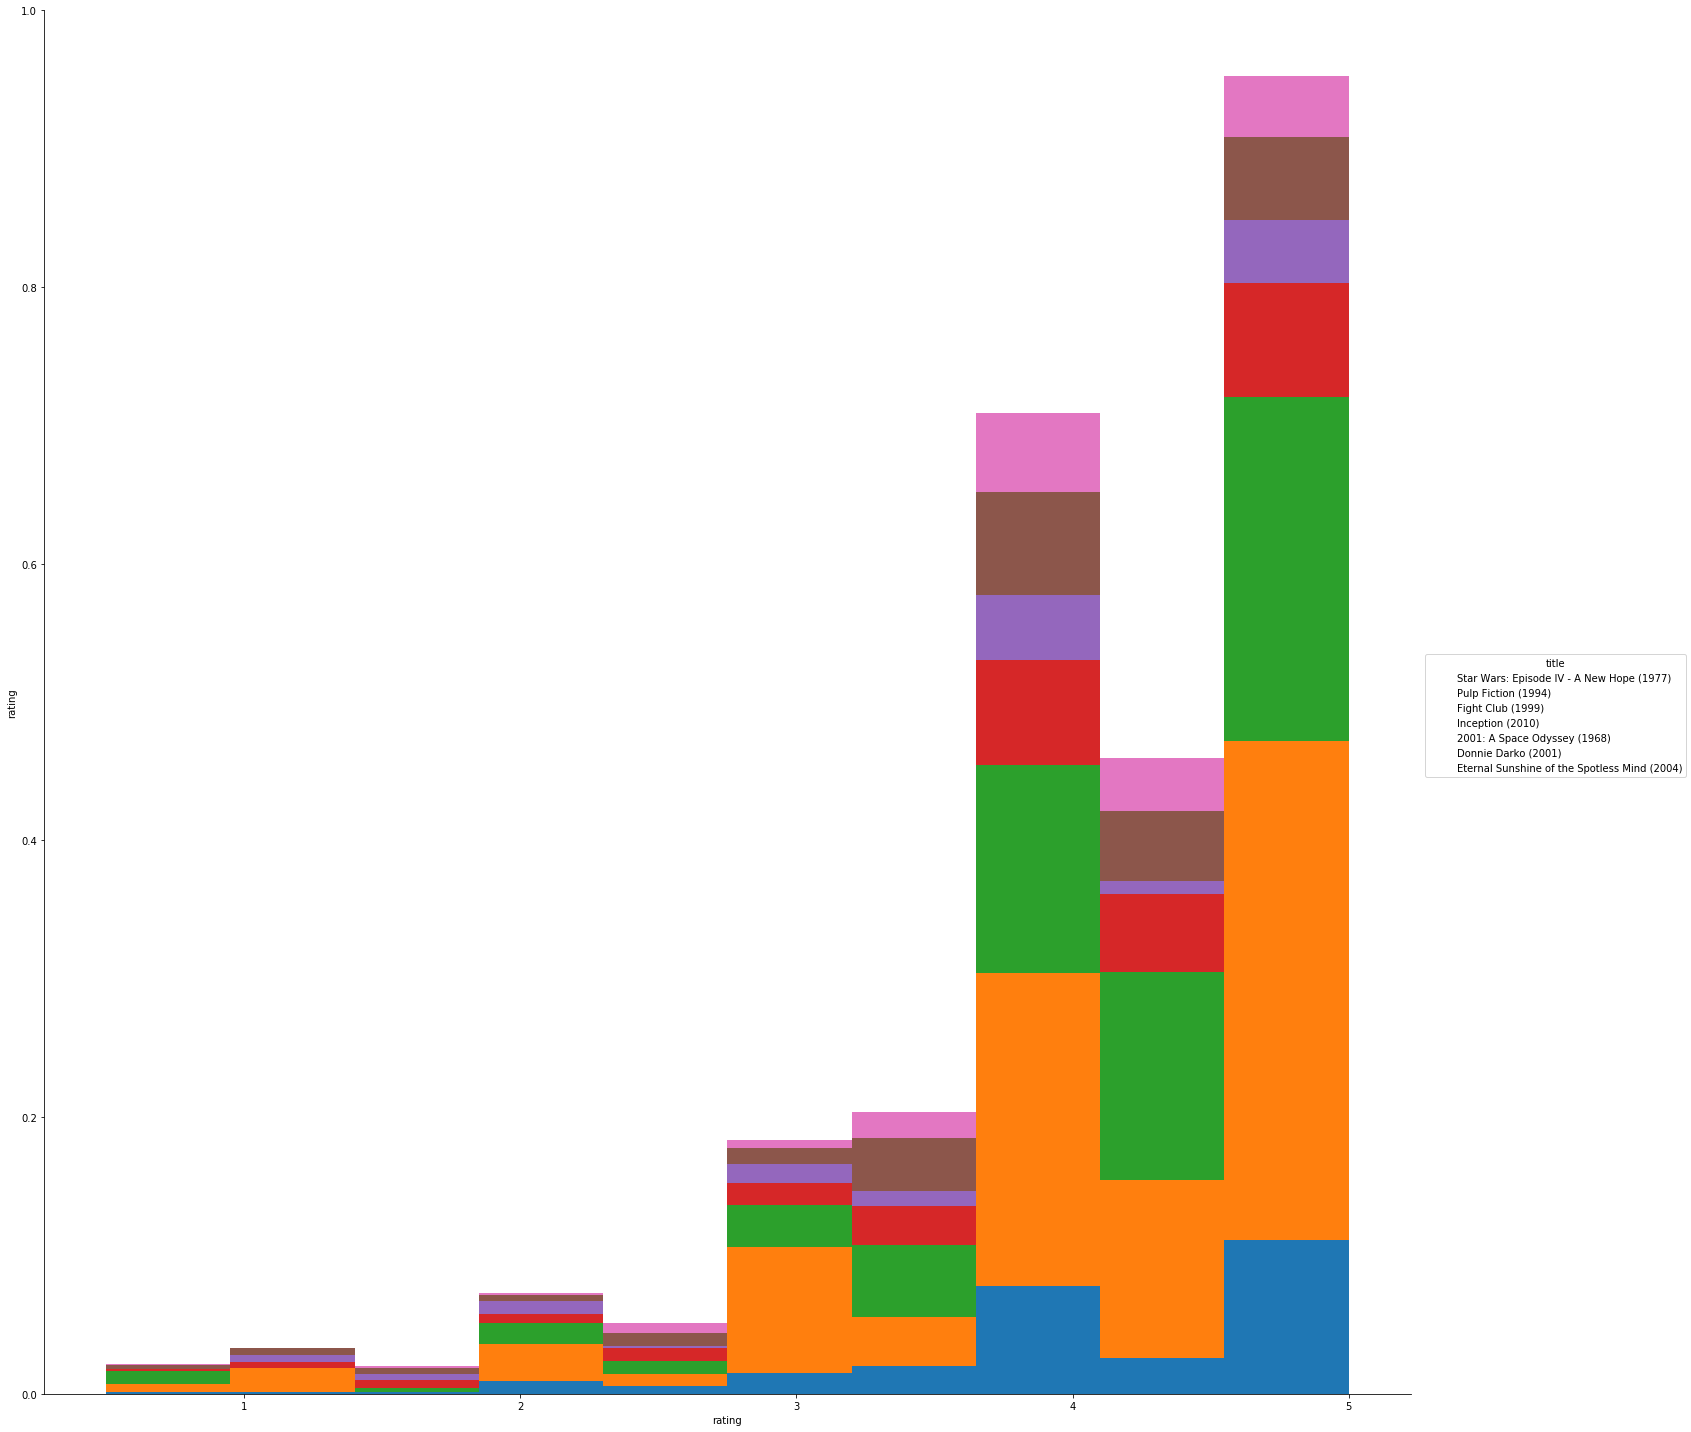

In [9]:
sns.pairplot(title_top, vars=["rating"], hue="title", size=20)

Below is a pairplot of rating by tags, using my subset with the top movies (i.e., dataset = "title_top", in which the movie title appeared more than 1000 times in the original dataset)

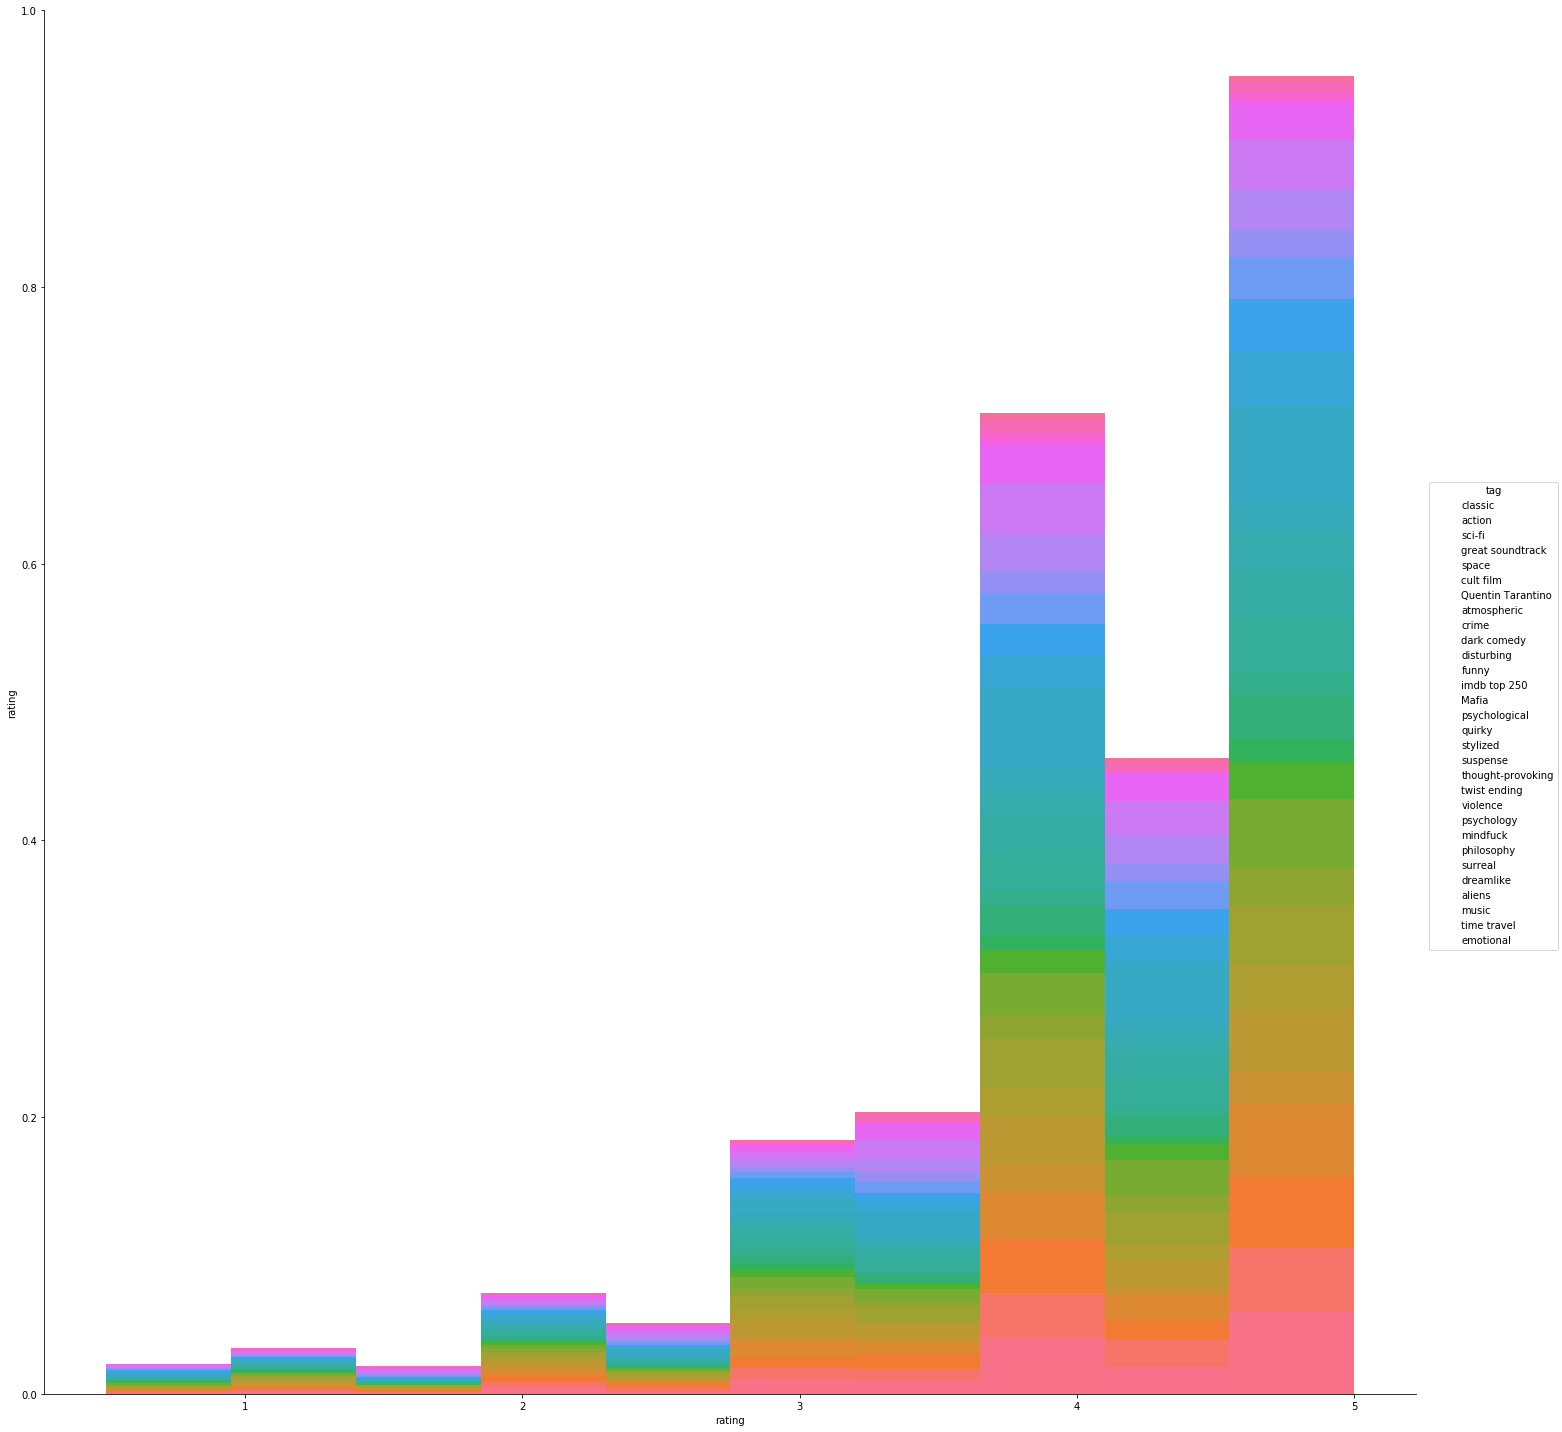

In [10]:
sns.pairplot(title_top, vars=["rating"], hue="tag", size=20)

Below is a pairplot of rating by movies, using my subset with the top tags (i.e., dataset = "tags_top", in which the tags appeared more than 1000 times in the original dataset)

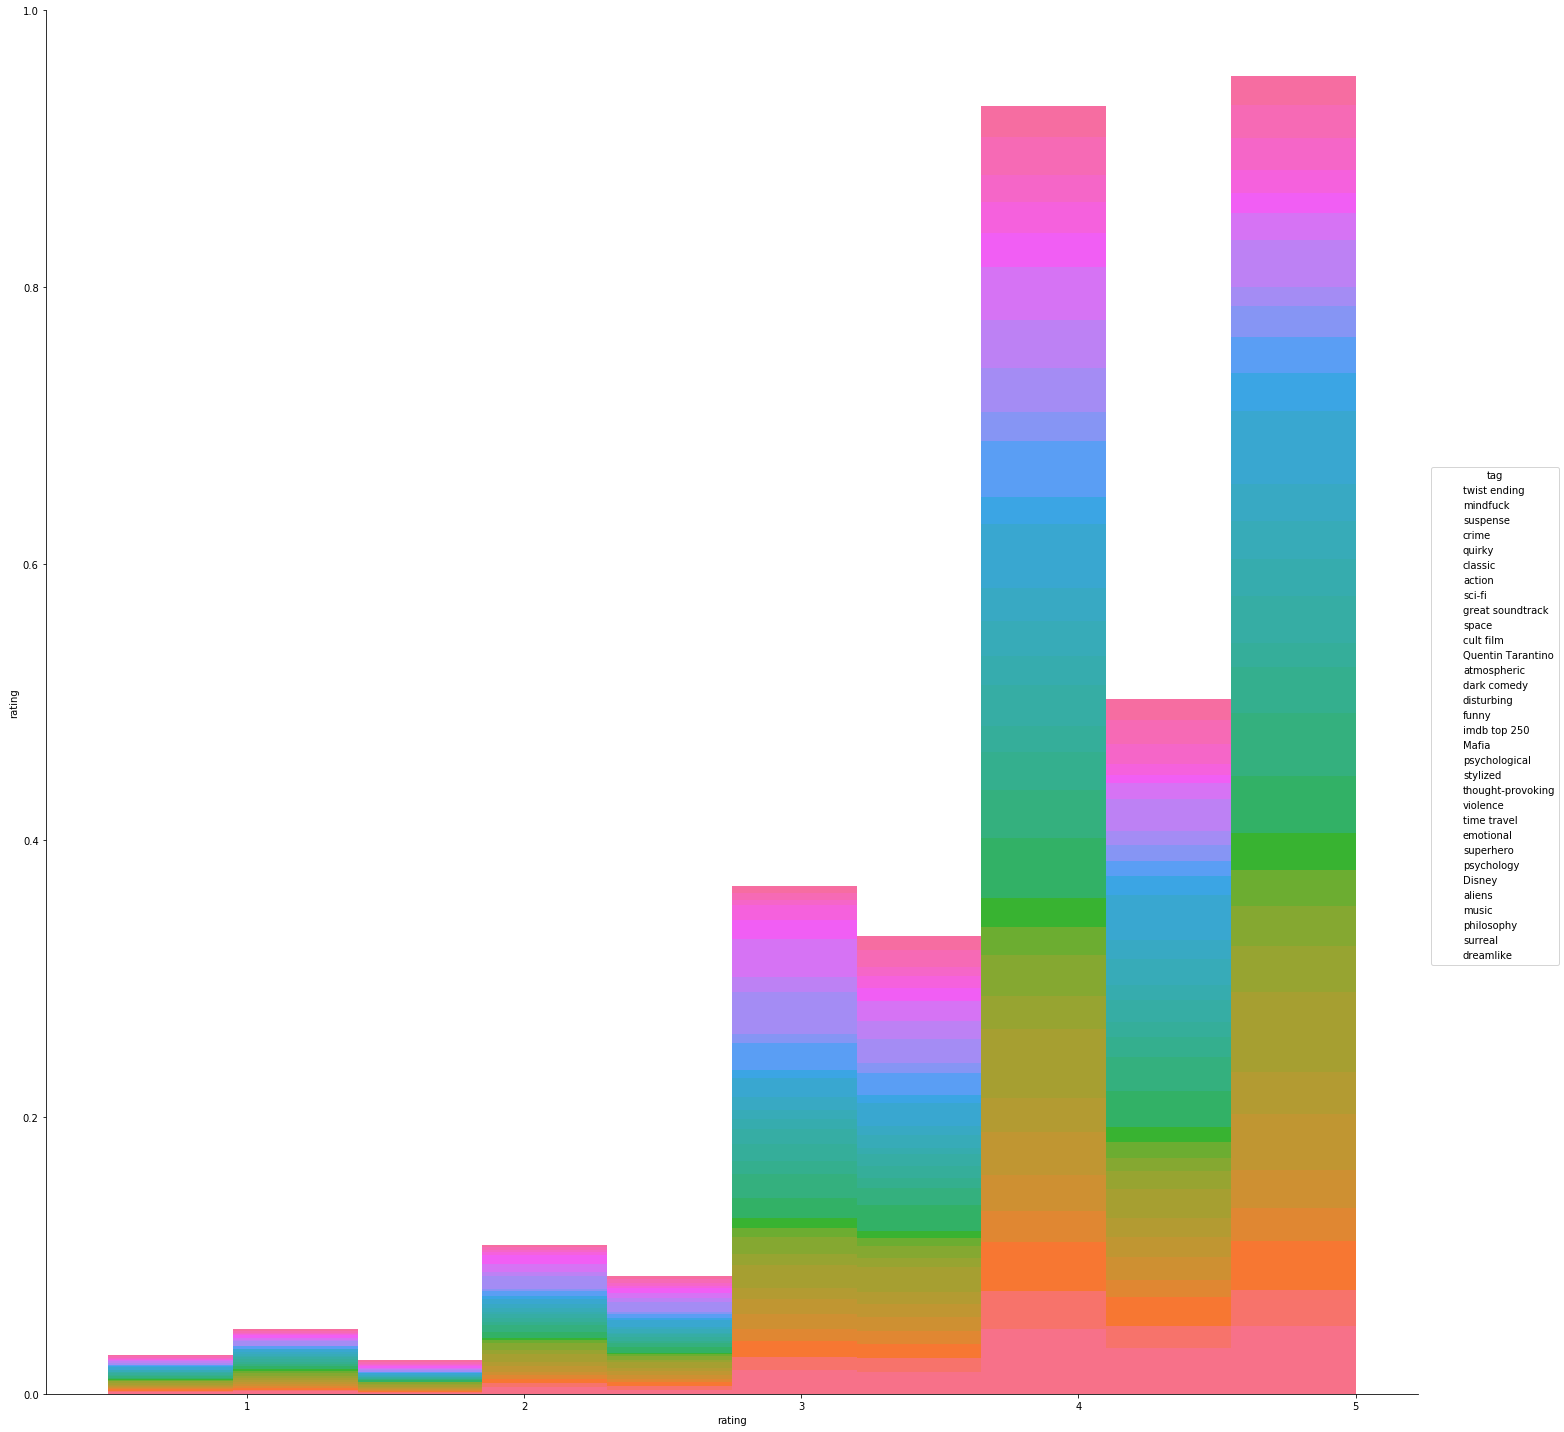

In [12]:
sns.pairplot(tags_top, vars=["rating"], hue="tag", size=20)

Below is a pairplot of rating by tags, using my subset with the top tags (i.e., dataset = "tags_top", in which the tags appeared more than 1000 times in the original dataset) 

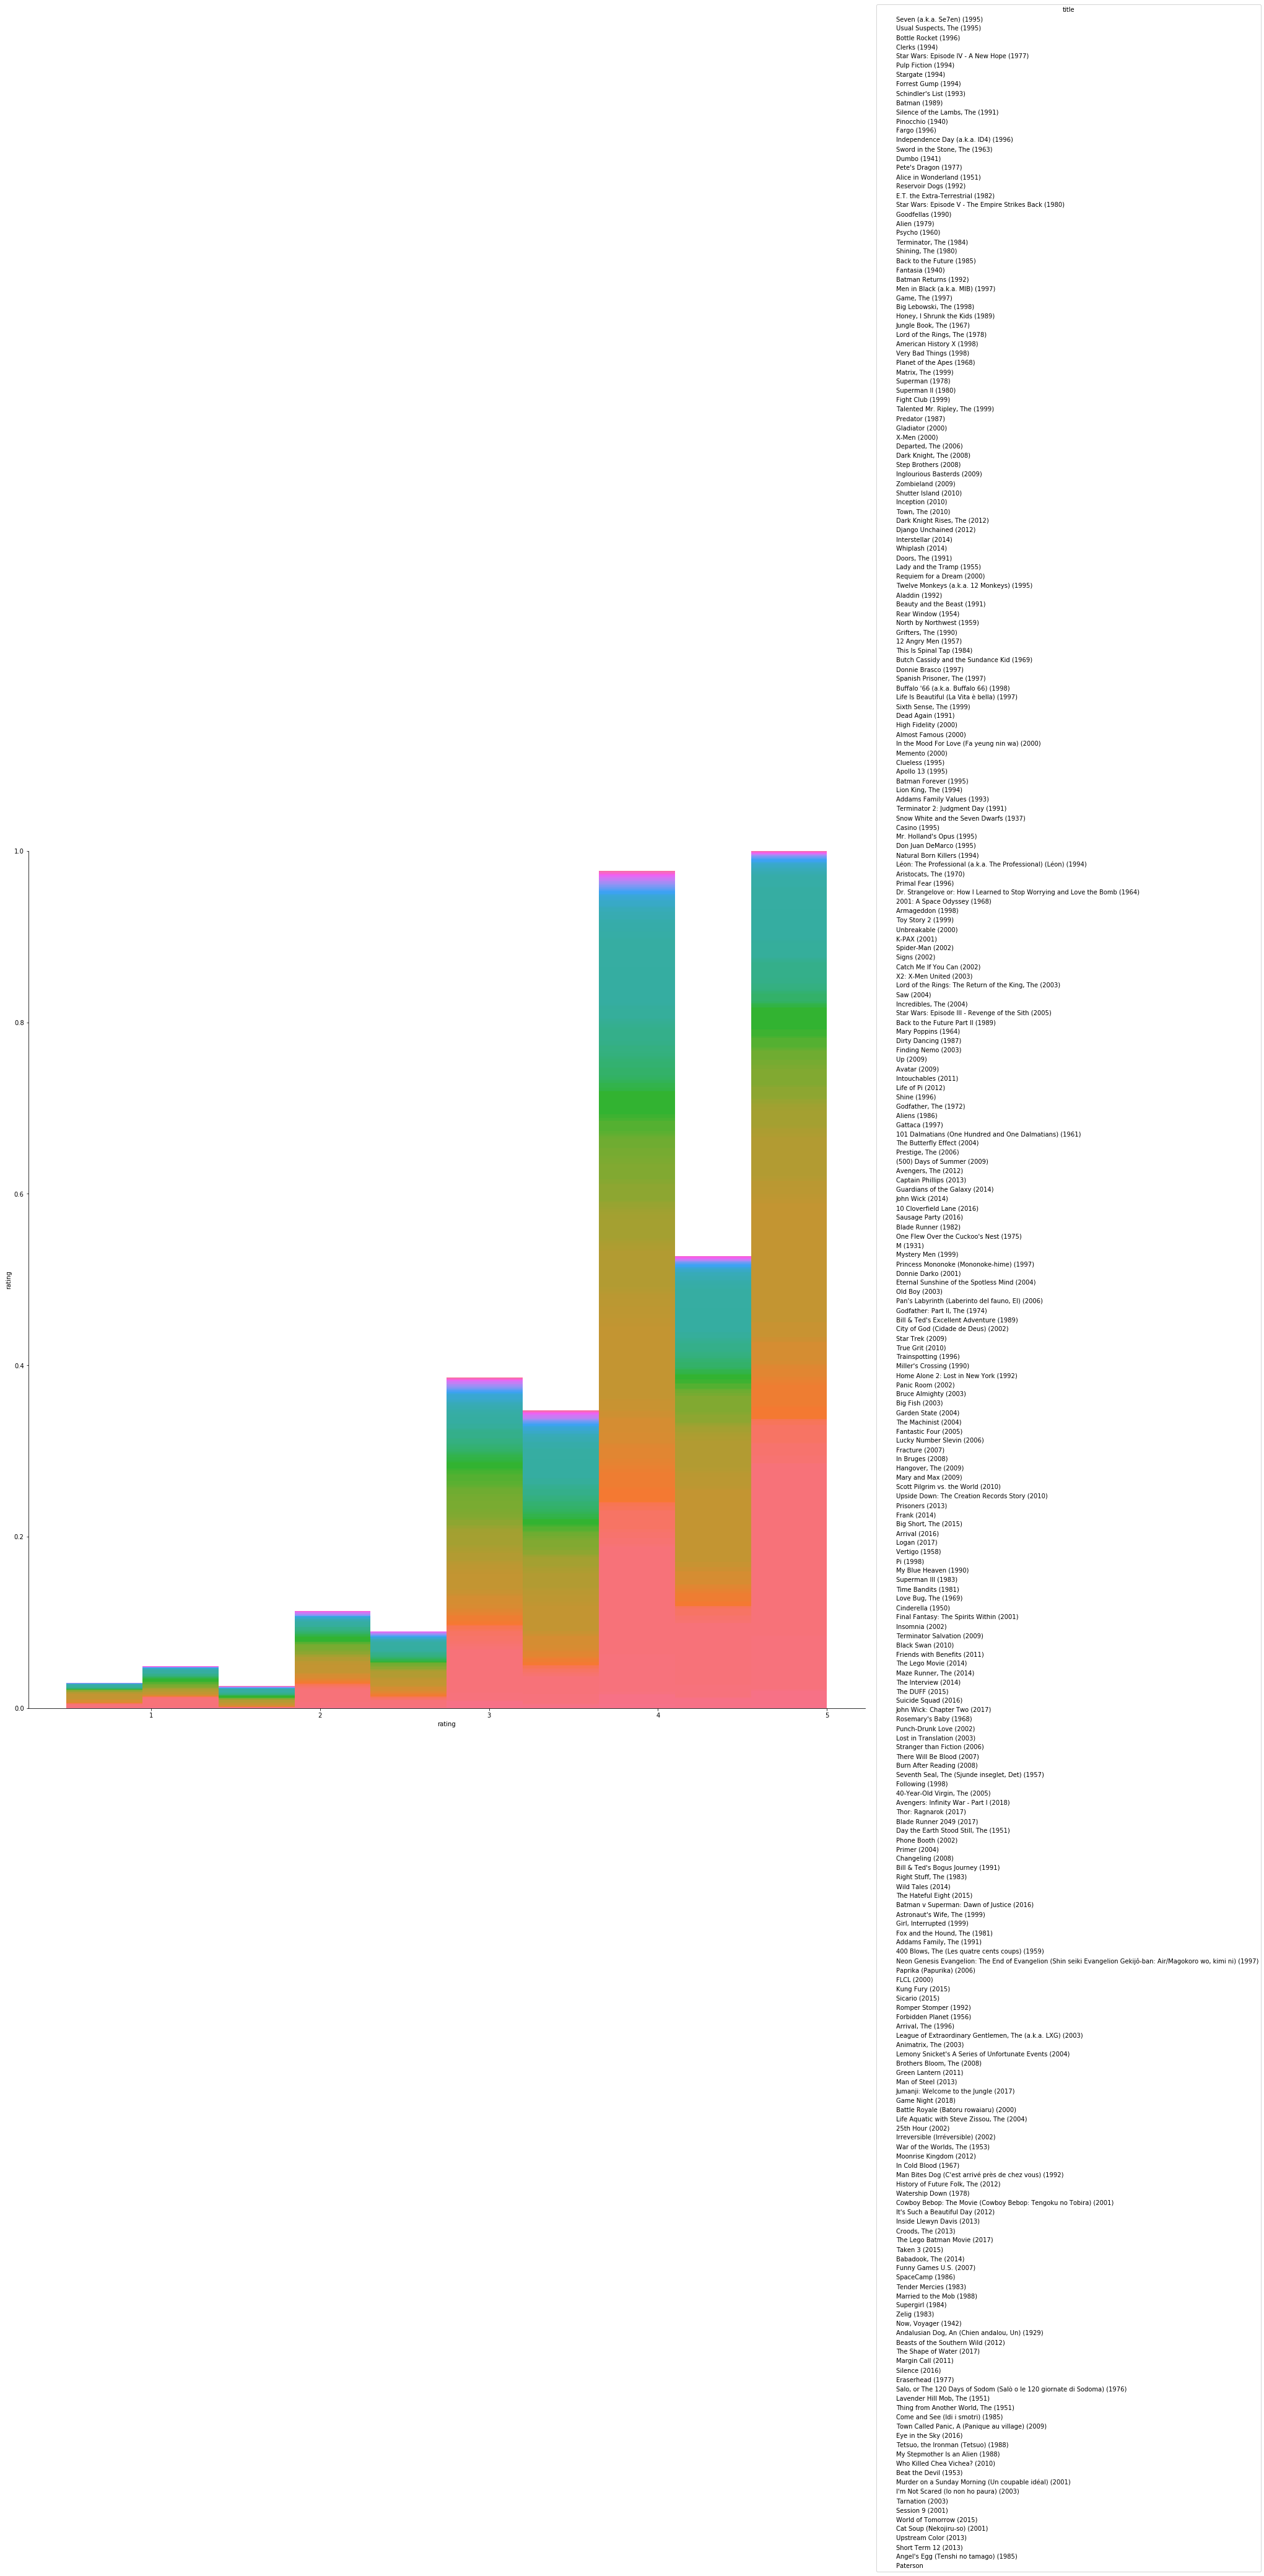

In [13]:
sns.pairplot(tags_top, vars=["rating"], hue="title", size=20)

# Histograms

First I plot the rating histograms by movies, using my subset with the top movies (i.e., dataset = "title_top",
in which the movie title appeared more than 1000 times in the original dataset)

After that, Iplot the rating histograms by tags, using my subset with the top tags (i.e., dataset = "tags_top",
in which the tags appeared more than 1000 times in the original dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05CA9B10>,
      dtype=object)

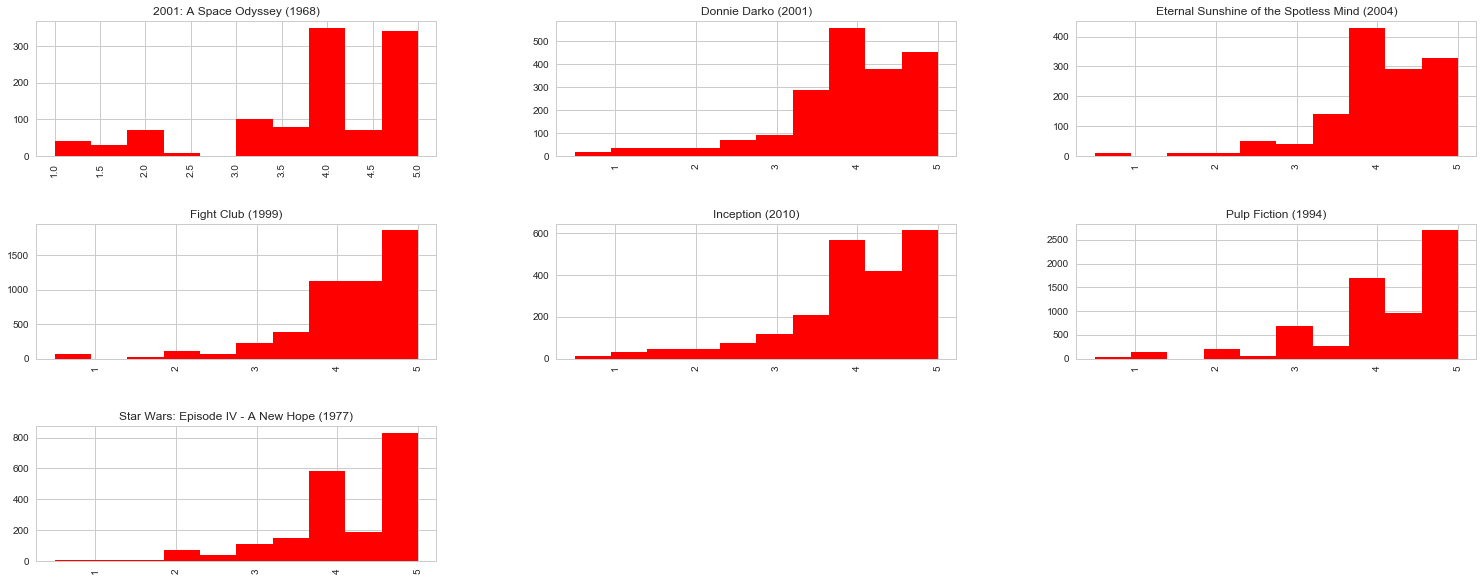

In [15]:
rcParams['figure.figsize'] = 25,10
title_top['rating'].hist(by=title_top['title'], color='red')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x05E2A7D0>,
      dtype=object)

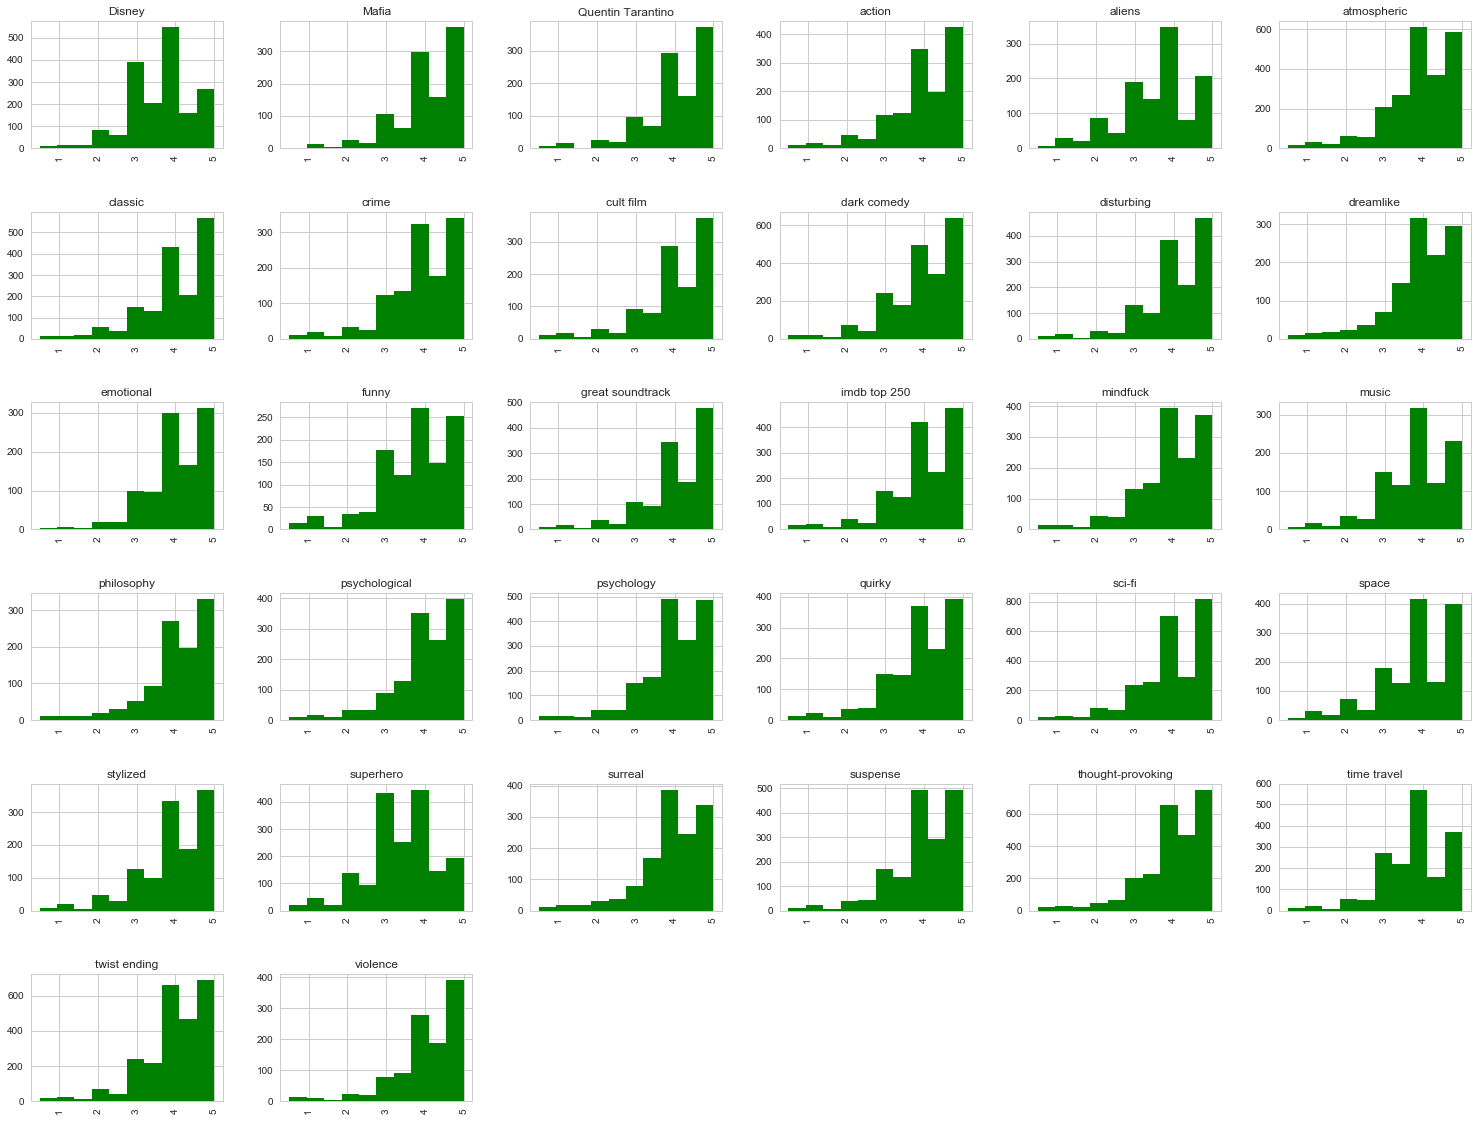

In [16]:
rcParams['figure.figsize'] = 25,20
tags_top['rating'].hist(by=tags_top['tag'], color='green')

In [17]:
#tags_top['rating'].plot(kind='bar', by=tags_top['tag'], color='purple', figsize=(25,12))

In [18]:
#title_top['rating'].plot(kind='bar', by=title_top['title'], color='yellow', figsize=(25,12))

# Boxplots

Creating rating boxplots by tags, using my subset with the top tags (i.e., dataset = "tags_top", in which the tags appeared more than 1000 times in the original dataset)

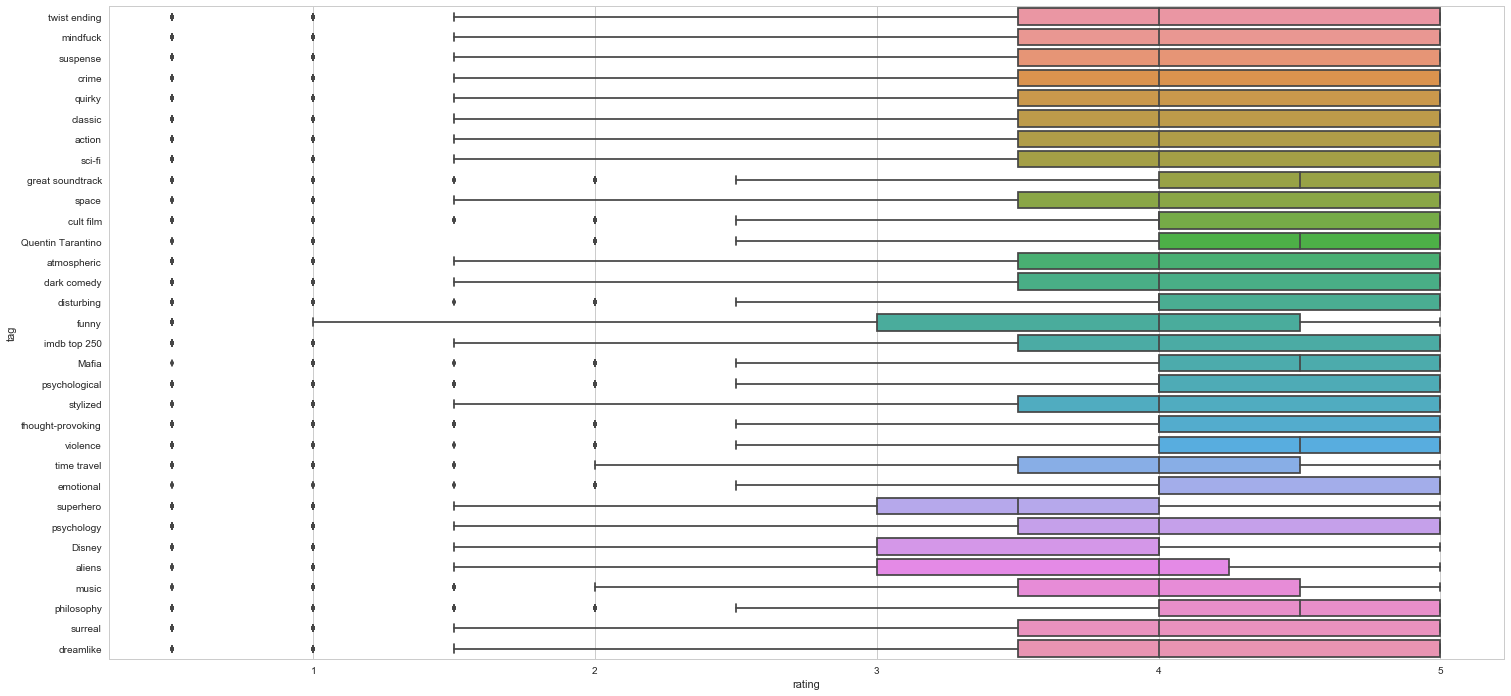

In [19]:
rcParams['figure.figsize'] = 25,12
sns.boxplot(x="rating", y="tag", data=tags_top)

Creating rating boxplot by movies, using my subset with the top movies (i.e., dataset = "title_top", in which the movie title appeared more than 1000 times in the original dataset) 

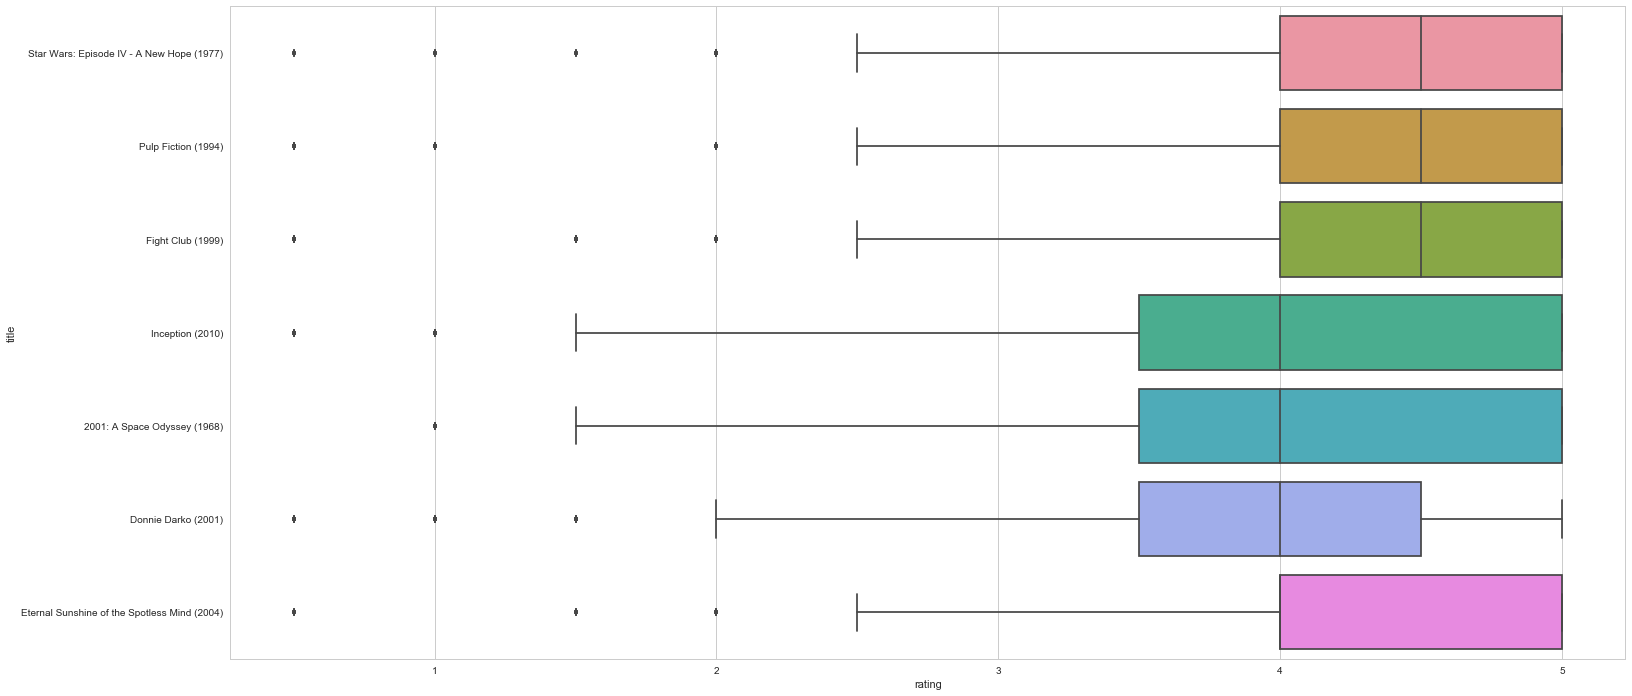

In [24]:
rcParams['figure.figsize'] = 25,12
sns.boxplot(x="rating", y="title", data=title_top)

Creating rating boxplots by tags and movies (as second level), using my subset with the top tags (i.e., dataset = "tags_top", in which the tags appeared more than 1000 times in the original dataset)

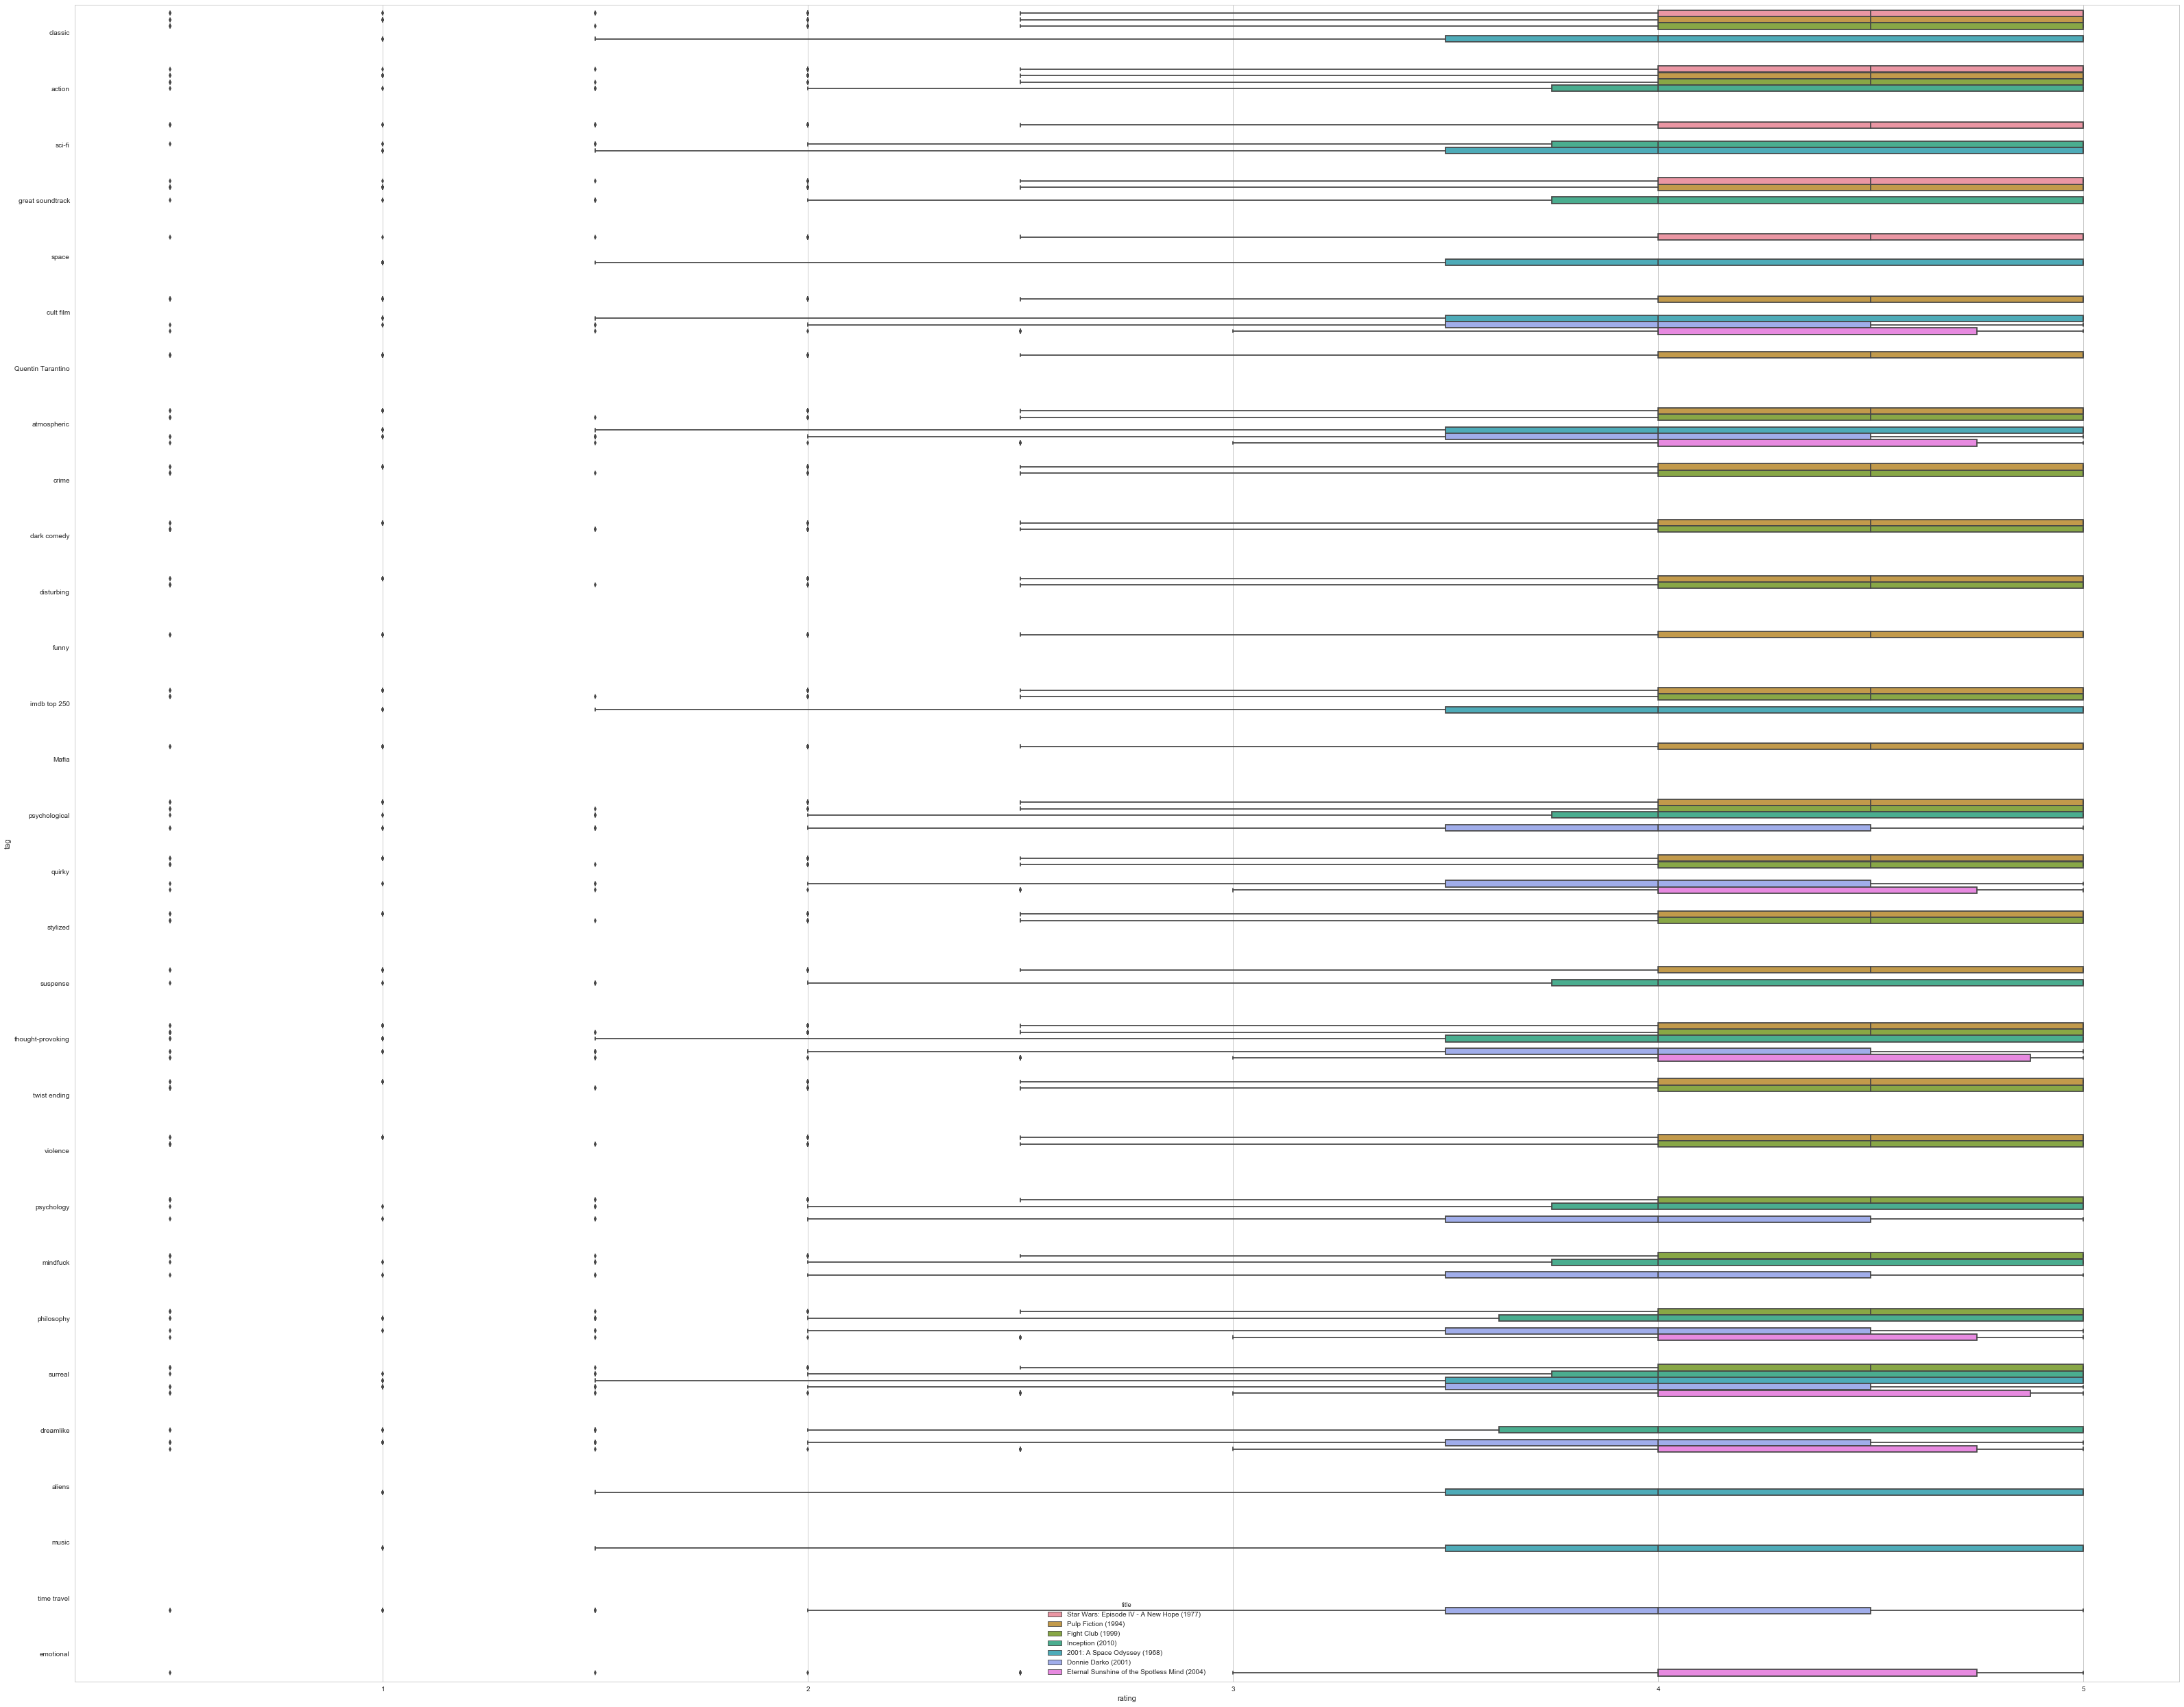

In [21]:
rcParams['figure.figsize'] = 55,45
sns.boxplot(x="rating", y="tag", hue="title", data=title_top)